In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('pylab', 'inline')

# Reading data

In [2]:
data = pd.read_csv("data/AmesHousing.csv")

In [3]:
data.drop(["PID","Order"],axis="columns",inplace=True) #nos deshacemos de el índice de instancia e id
data = data[data['Garage Yr Blt']!=2207] #eliminamos outlier año=2207

In [5]:
len(data.columns)

80

In [20]:
data["Exterior 1stp"] = data["Exterior 1st"].apply(lambda x: "Other" if x not in ["VinylSd","Wd Sdng","MetalSd","Plywood","HdBoard"] else x)
data["Exterior 2ndp"] = data["Exterior 2nd"].apply(lambda x: "Other" if x not in ["VinylSd","Wd Sdng","MetalSd","Plywood","HdBoard"] else x)

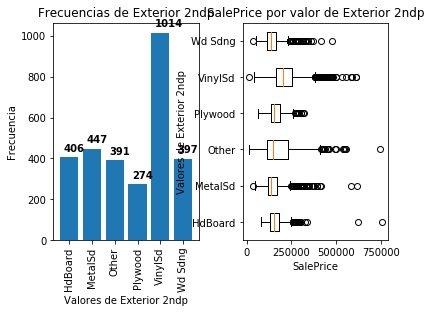

In [21]:
cat = "Exterior 2ndp"
freq = np.unique(data[cat],return_counts=True)
counts_by_value = data.groupby(data[cat])[label].apply(lambda x: np.array(x))

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.3)

ax1.bar(freq[0], freq[1])

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

for i, v in enumerate(freq[1]):
    ax1.text(i-.25,v+30, str(v), color='black', fontweight='bold')

ax1.set_title("Frecuencias de %s" % cat)
ax1.set_xlabel("Valores de %s" % cat)
ax1.set_ylabel("Frecuencia")

ax2.boxplot(counts_by_value, labels=counts_by_value.index,vert=False)

ax2.set_title("%s por valor de %s" % (label,cat))
ax2.set_xlabel("%s" % label)
ax2.set_ylabel("Valores de %s" % cat)

plt.show()

In [6]:
attr = np.array(list(data.columns))
numerical = ["Lot Frontage", "Lot Area", "Overall Qual", "Overall Cond", "Year Built", "Year Remod/Add", 
             "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "1st Flr SF",
             "2nd Flr SF", "Low Qual Fin SF", "Gr Liv Area", "Bsmt Full Bath", "Bsmt Half Bath", "Full Bath",
             "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "TotRms AbvGrd", "Fireplaces", "Garage Yr Blt", 
             "Garage Cars", "Garage Area", "Wood Deck SF", "Open Porch SF", "Enclosed Porch", "3Ssn Porch",
             "Screen Porch", "Pool Area", "Misc Val", "Mo Sold", "Yr Sold","SalePrice"]
label = "SalePrice"
categorical = np.setdiff1d(attr,numerical)

In [11]:
len(numerical) + len(categorical)

80

In [12]:
categorical

array(['Alley', 'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Qual',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air', 'Condition 1',
       'Condition 2', 'Electrical', 'Exter Cond', 'Exter Qual',
       'Exterior 1st', 'Exterior 2nd', 'Fence', 'Fireplace Qu',
       'Foundation', 'Functional', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Heating', 'Heating QC',
       'House Style', 'Kitchen Qual', 'Land Contour', 'Land Slope',
       'Lot Config', 'Lot Shape', 'MS SubClass', 'MS Zoning',
       'Mas Vnr Type', 'Misc Feature', 'Neighborhood', 'Paved Drive',
       'Pool QC', 'Roof Matl', 'Roof Style', 'Sale Condition',
       'Sale Type', 'Street', 'Utilities'], dtype='<U15')

In [9]:
data_cat = data[categorical].fillna("UNKNOWN")
data_cat[label] = data[label]
data_num = data[numerical]
data_num[label] = data[label]

A:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mapping:

In [25]:
electricalMap = lambda x: x if x=="SBrkr" else "Other"
lotshapeMap = lambda x: x if x=="Reg" else "IR"
mszoningMap = lambda x: x if x in ["RL","RM","FV"] else "Other"
paveddriveMap = lambda x: x if x=="Y" else "N/P"
roofstyleMap = lambda x: x if x in ["Gable","Hip"] else "Other"
saleconditionMap = lambda x: x if x in ["Normal","Partial","Abnorml"] else "Other"
saletypeMap = lambda x: x if x=="New" else "Not New"

In [26]:
data_cat["Electrical"] = data_cat.Electrical.apply(electricalMap)
data_cat["Lot Shape"] = data_cat["Lot Shape"].apply(lotshapeMap)
data_cat["MS Zoning"] = data_cat["MS Zoning"].apply(mszoningMap)
data_cat["Paved Drive"] = data_cat["Paved Drive"].apply(paveddriveMap)
data_cat["Roof Style"]  = data_cat["Roof Style"].apply(roofstyleMap)
data_cat["Sale Condition"] = data_cat["Sale Condition"].apply(saleconditionMap)
data_cat["Sale Type"] = data_cat["Sale Type"].apply(saletypeMap)

 # Representación de categoricas

In [29]:
pylab.rcParams['figure.figsize'] = (15, 5)
for cat in categorical:
    freq = np.unique(data_cat[cat],return_counts=True)
    counts_by_value = data_cat.groupby(data_cat[cat])[label].apply(lambda x: np.array(x))
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.3)
    
    ax1.bar(freq[0], freq[1])
    
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
    
    for i, v in enumerate(freq[1]):
        ax1.text(i-.25,v+30, str(v), color='black', fontweight='bold')
    
    ax1.set_title("Frecuencias de %s" % cat)
    ax1.set_xlabel("Valores de %s" % cat)
    ax1.set_ylabel("Frecuencia")
    
    ax2.boxplot(counts_by_value, labels=counts_by_value.index,vert=False)
    
    ax2.set_title("%s por valor de %s" % (label,cat))
    ax2.set_xlabel("%s" % label)
    ax2.set_ylabel("Valores de %s" % cat)
    
    #fig.savefig("graphs/modified/"+cat+".png",bbox_inches='tight')
    
    plt.show()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

# Representación de numéricos

In [37]:
means = data_num.mean()
std = data_num.std()

medians = data_num.quantile(q=0.5)
cuantiles25 = data_num.quantile(q=0.25)
cuantiles75 = data_num.quantile(q=0.75)

mins = data_num.min()
maxs = data_num.max()

numnans = data_num.isna().sum()

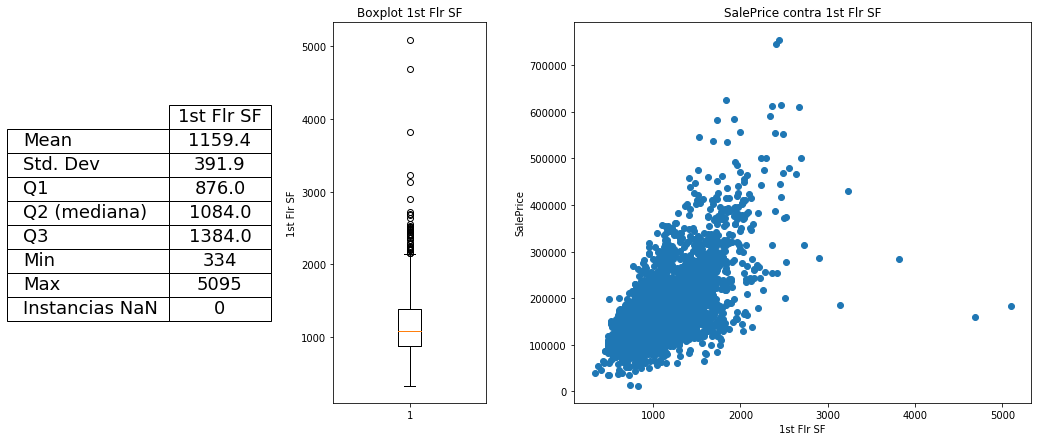

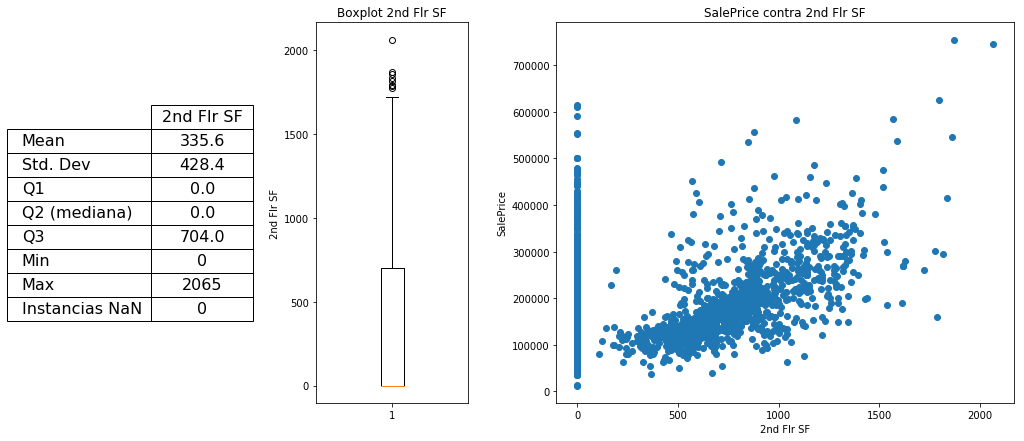

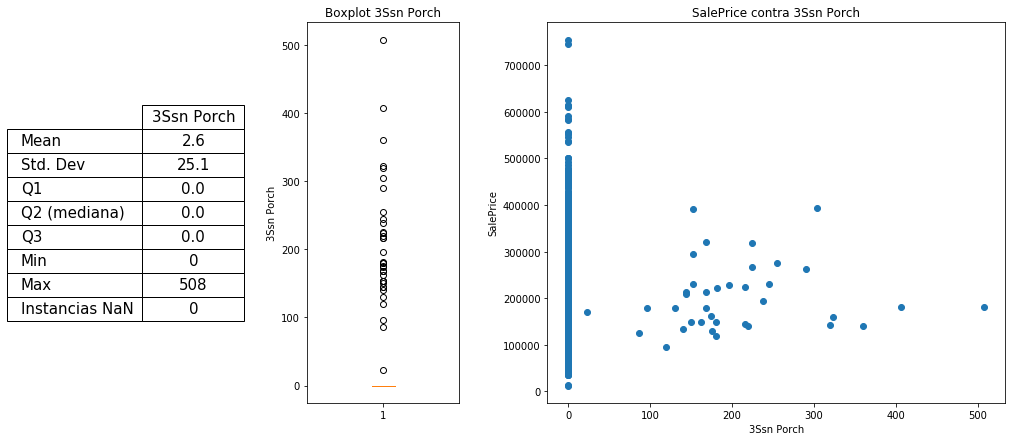

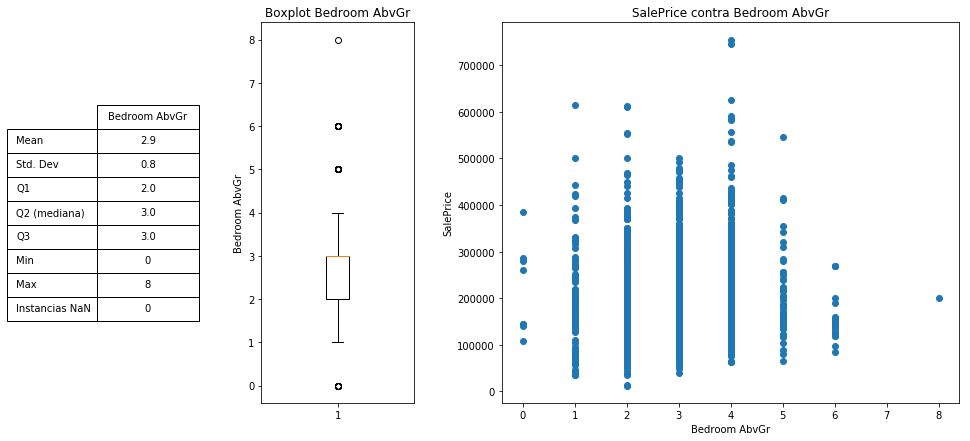

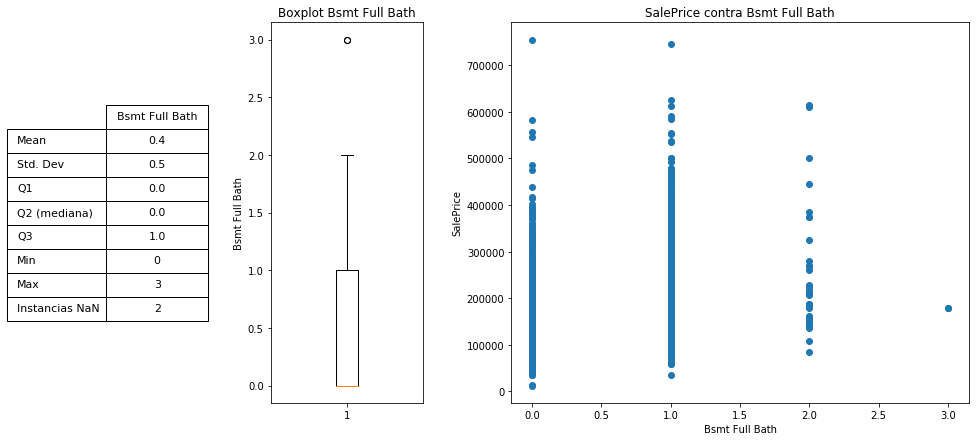

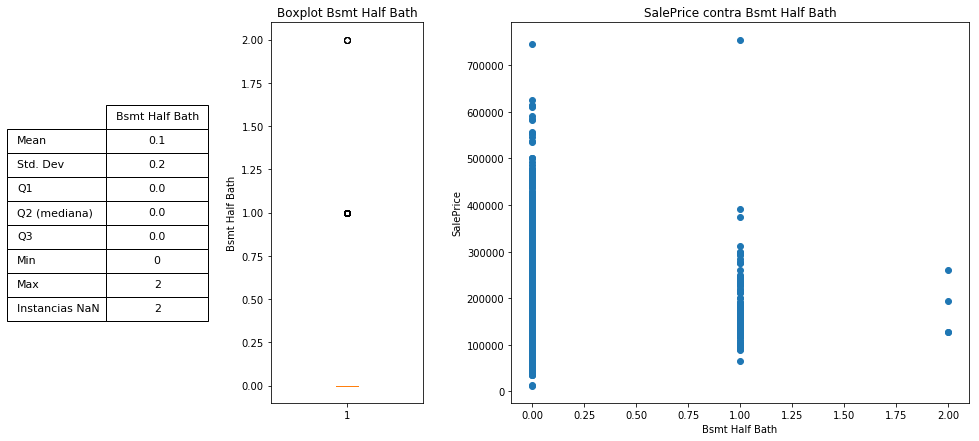

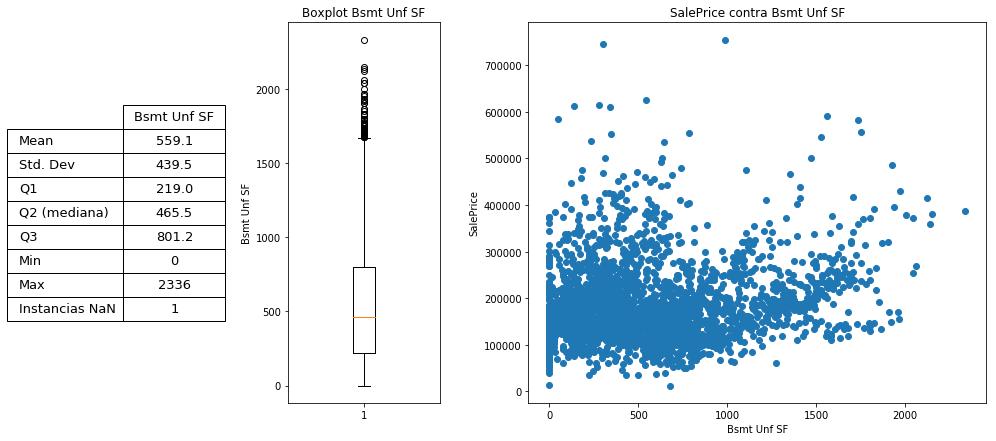

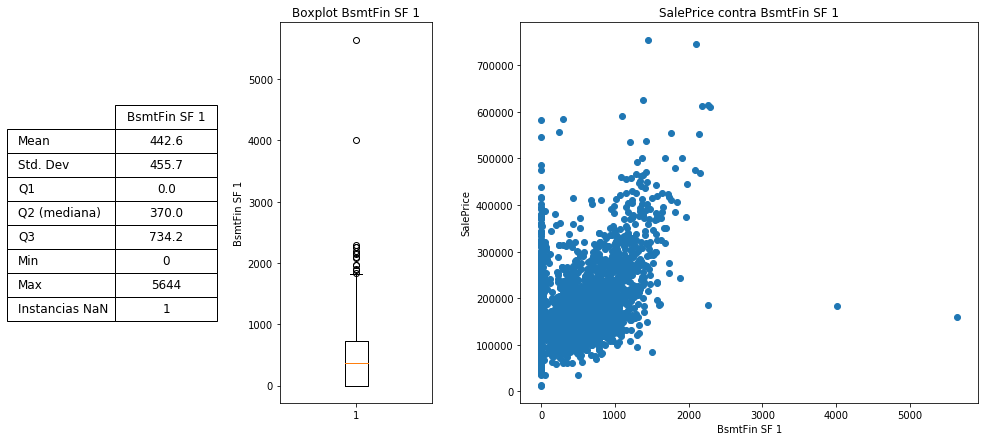

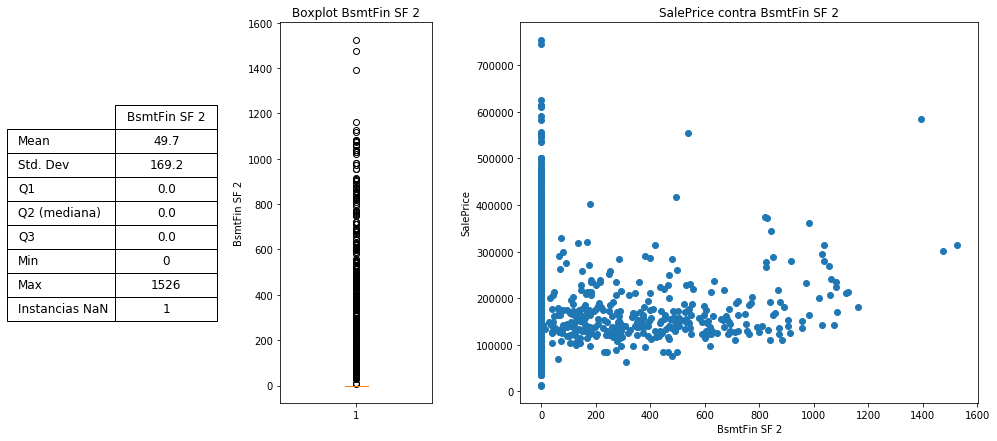

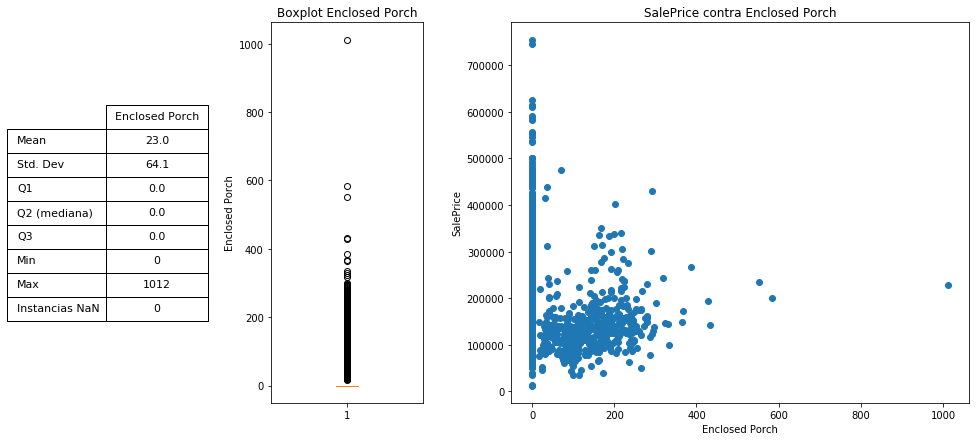

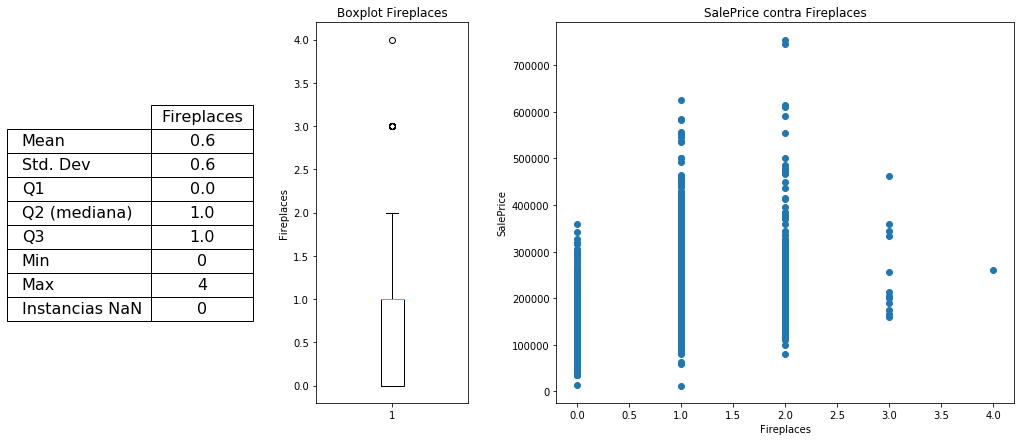

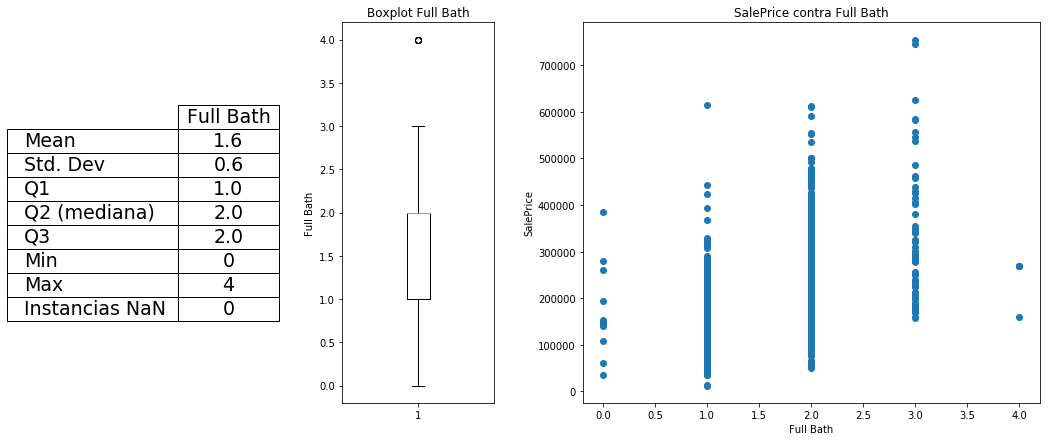

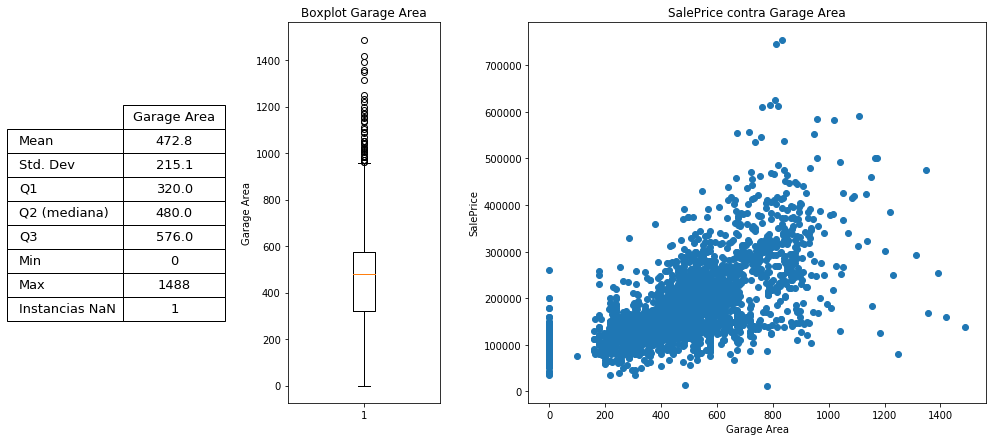

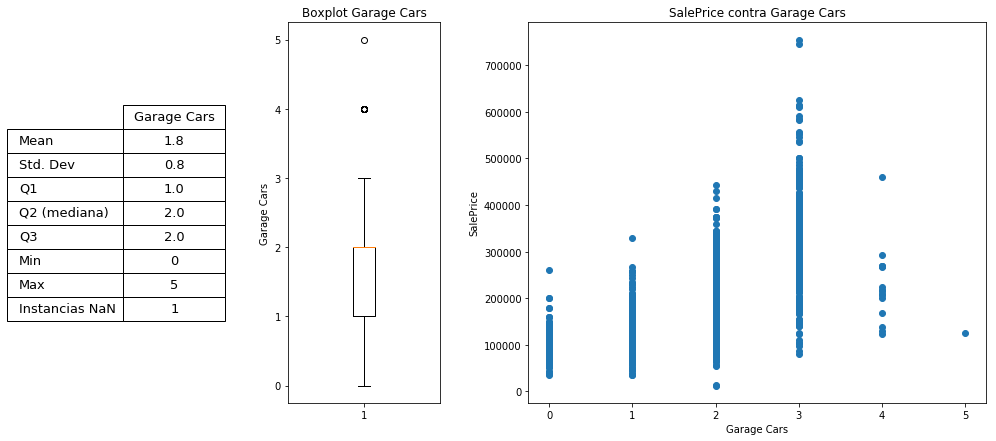

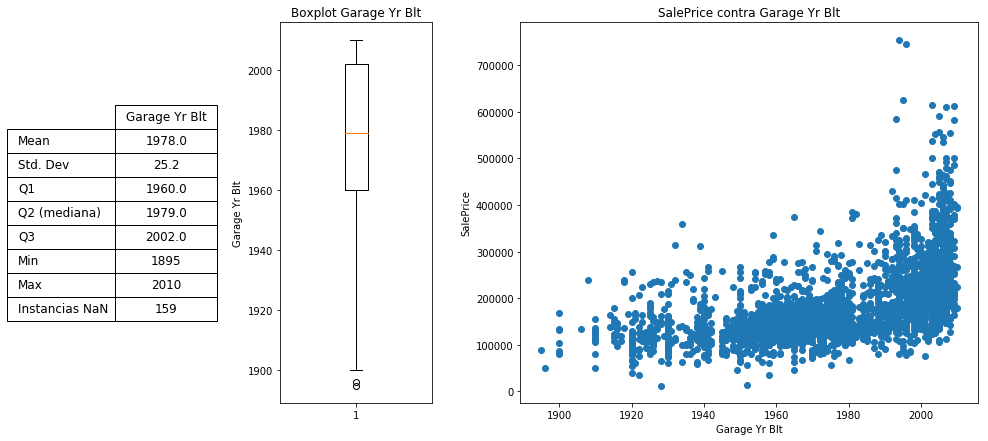

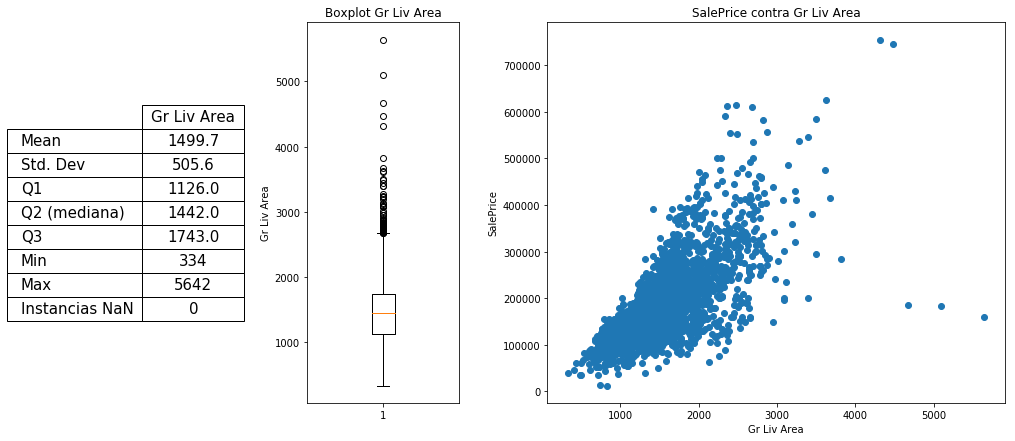

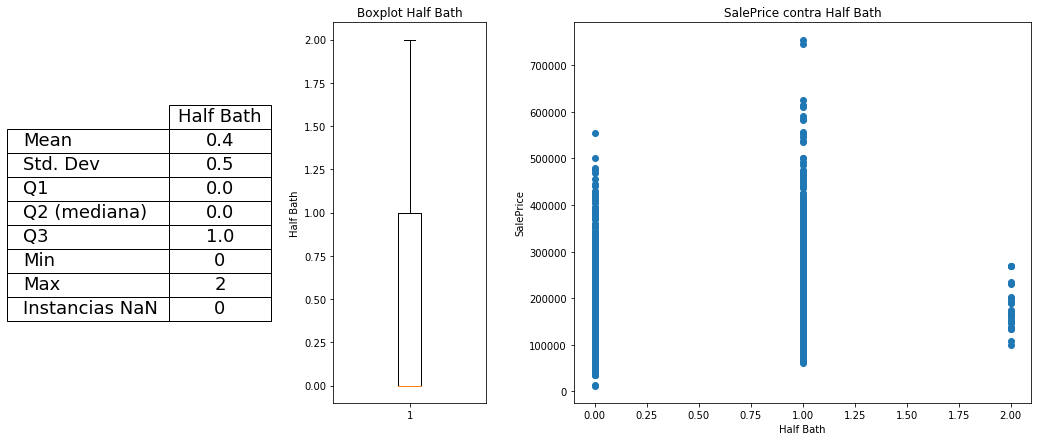

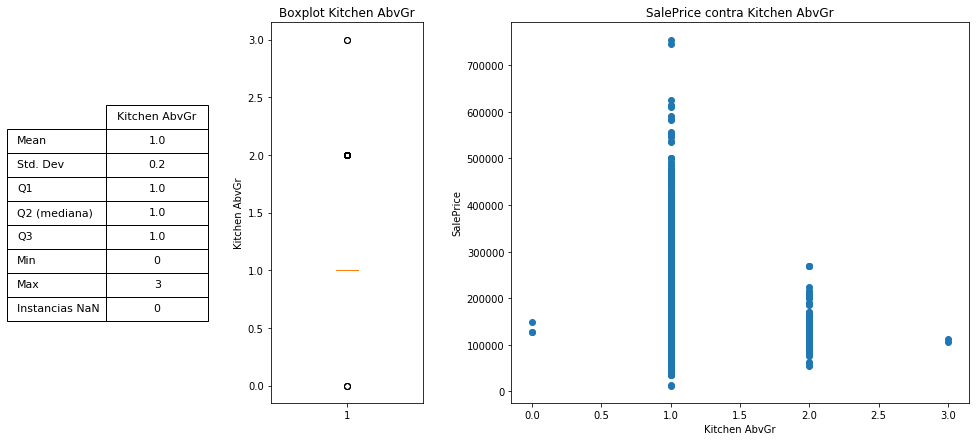

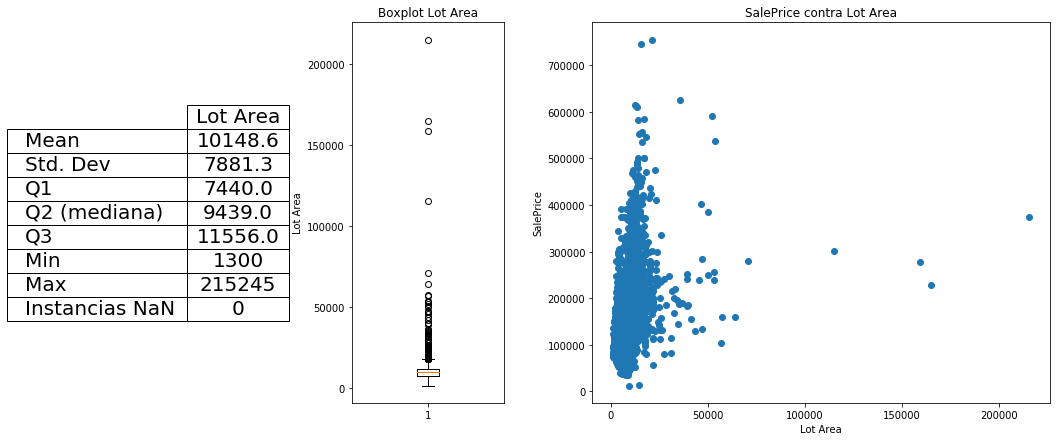

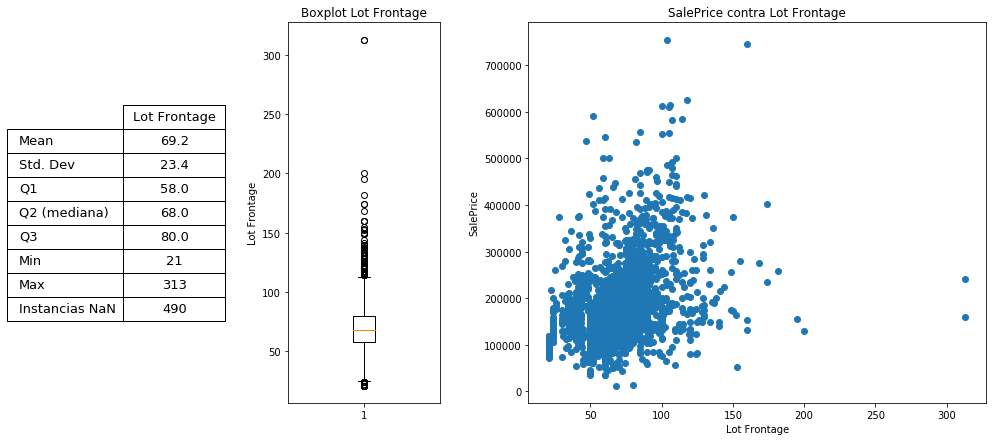

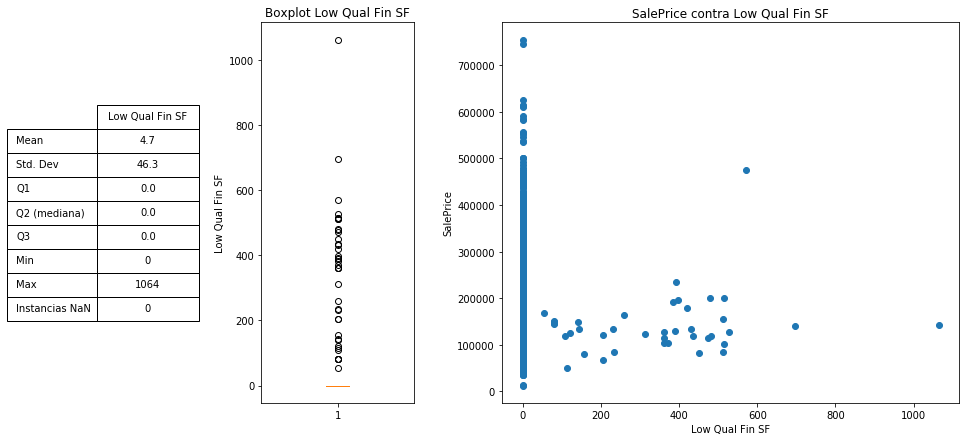

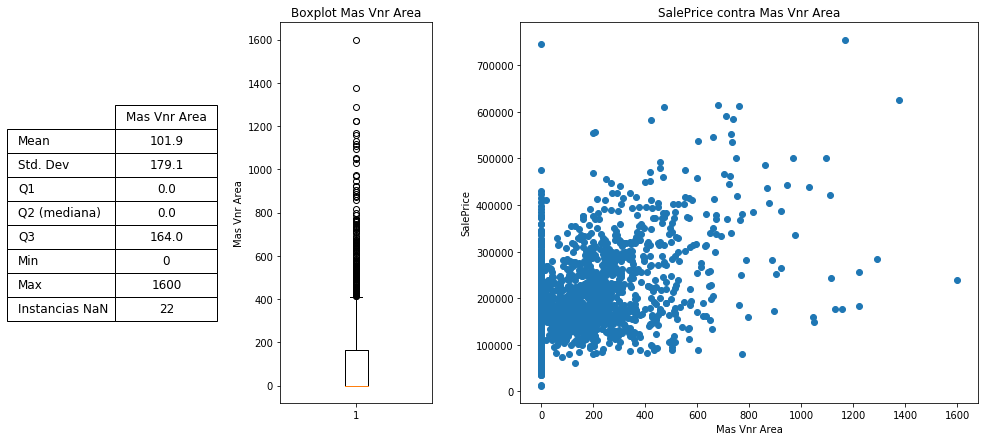

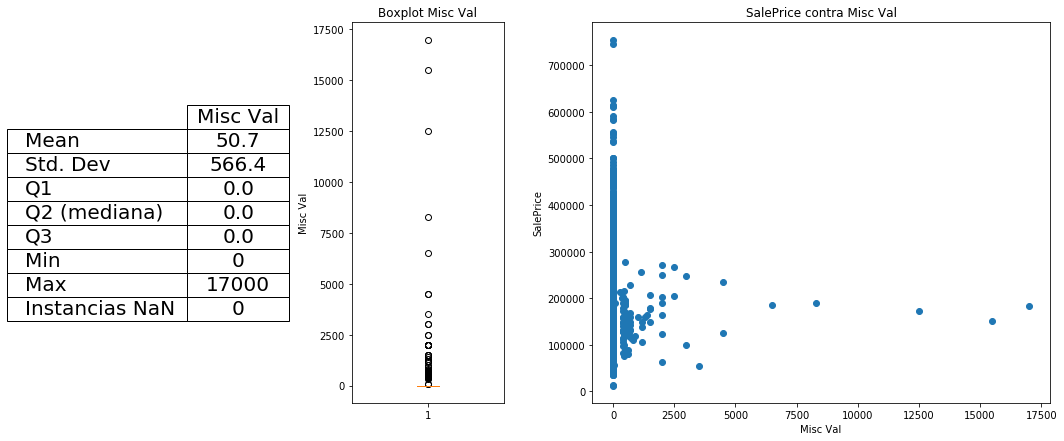

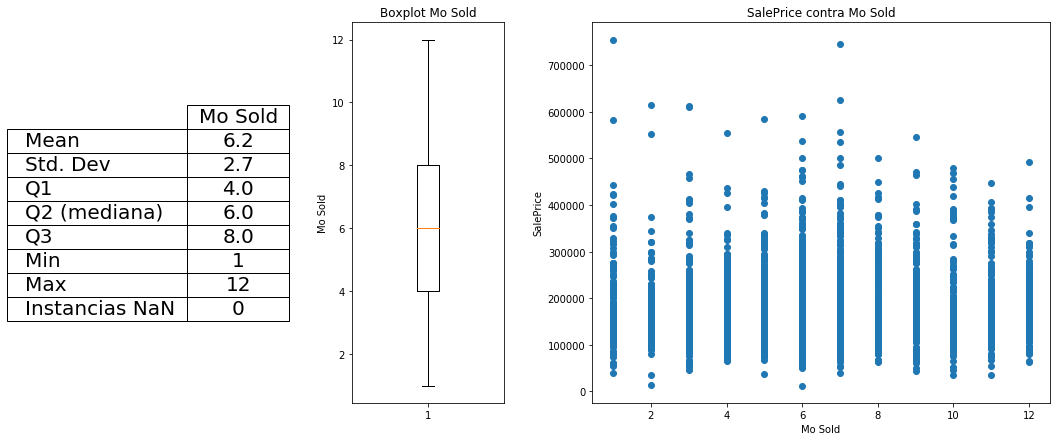

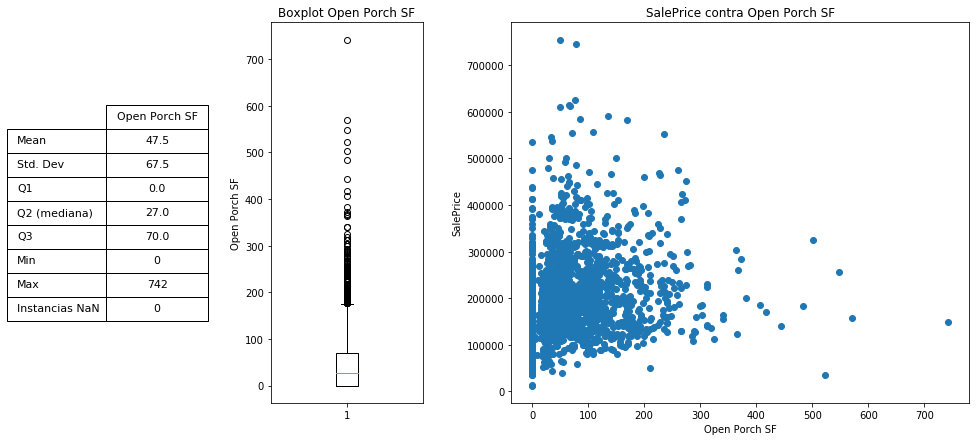

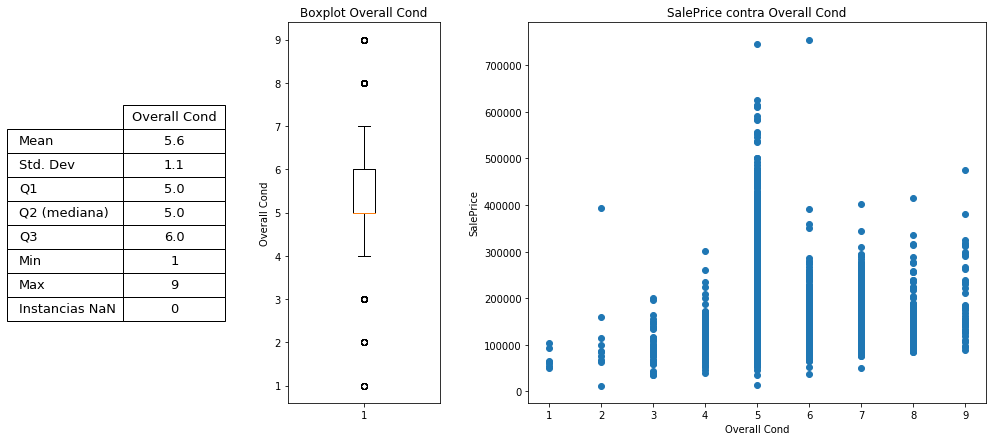

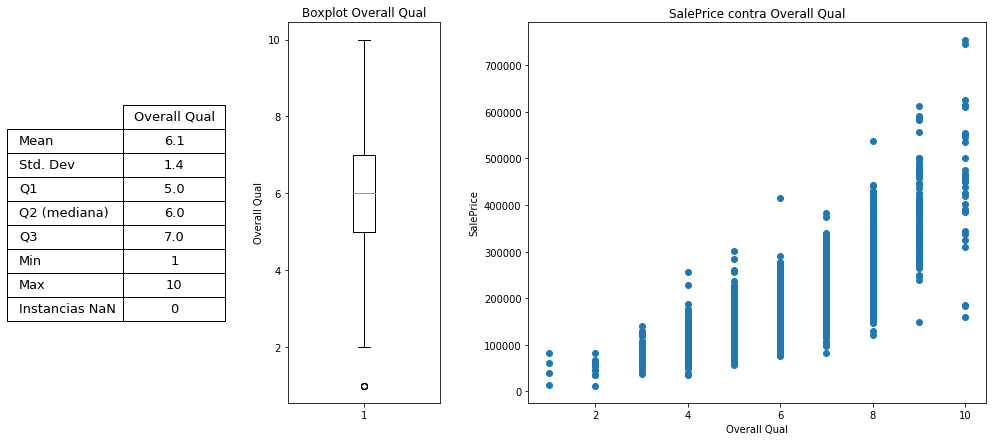

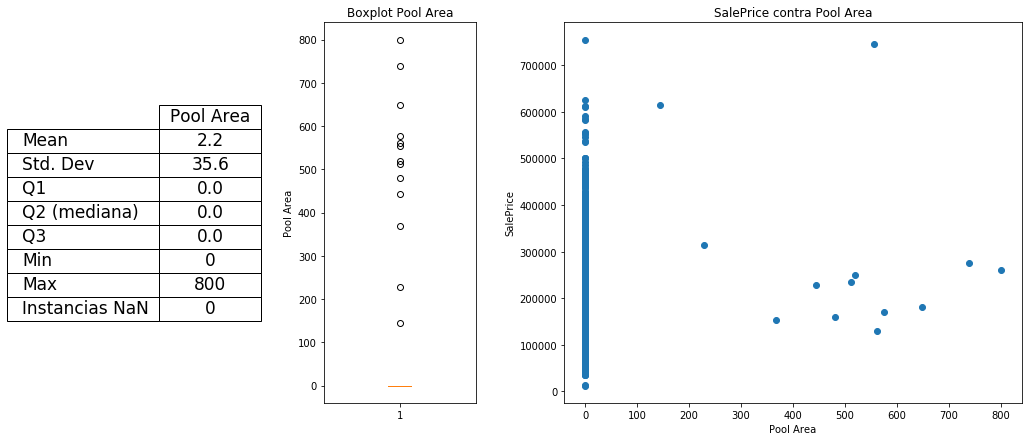

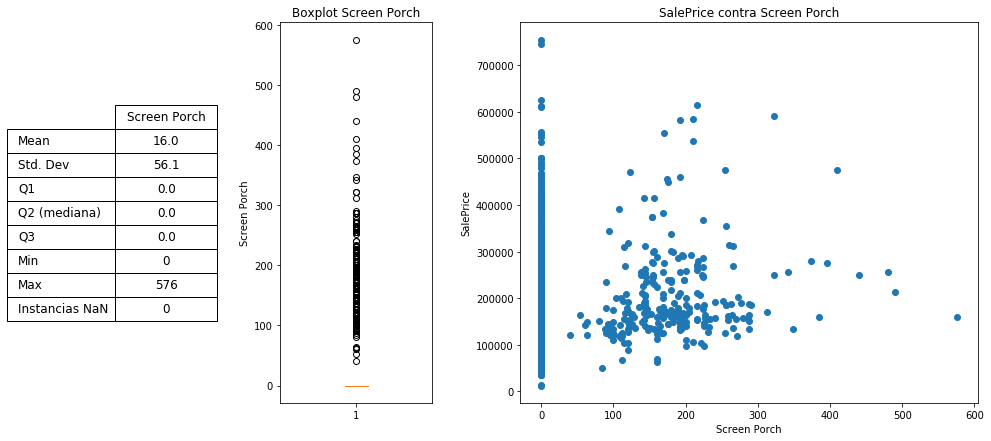

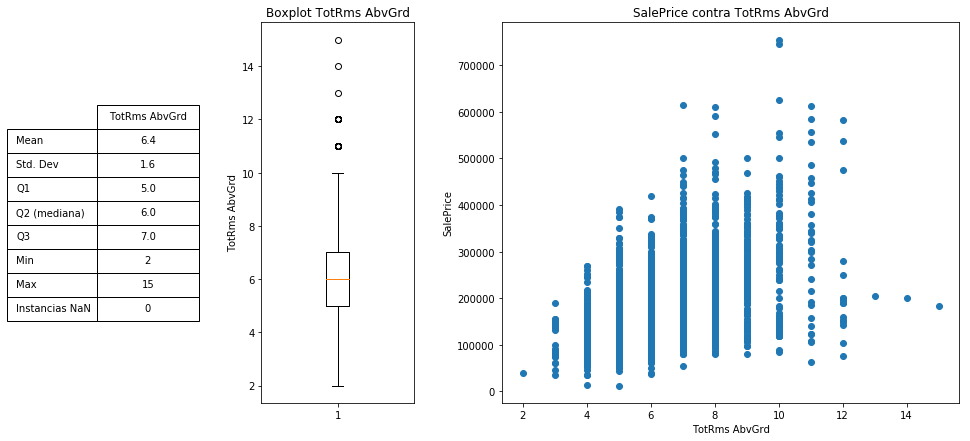

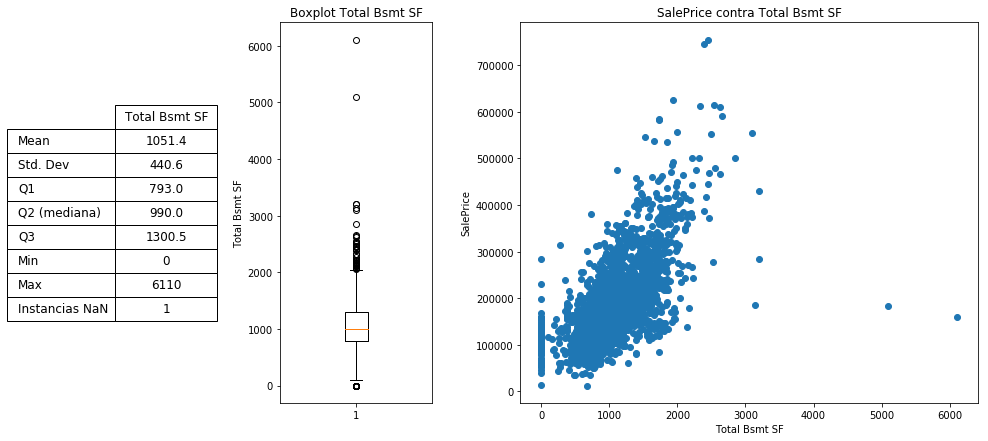

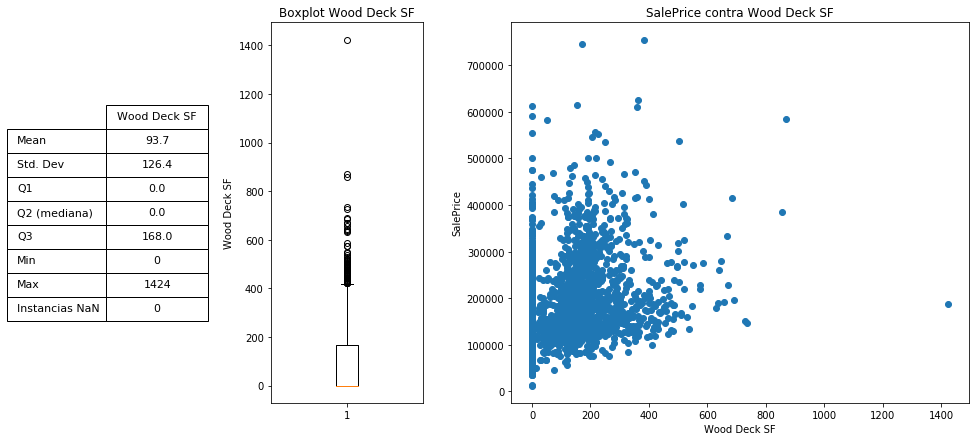

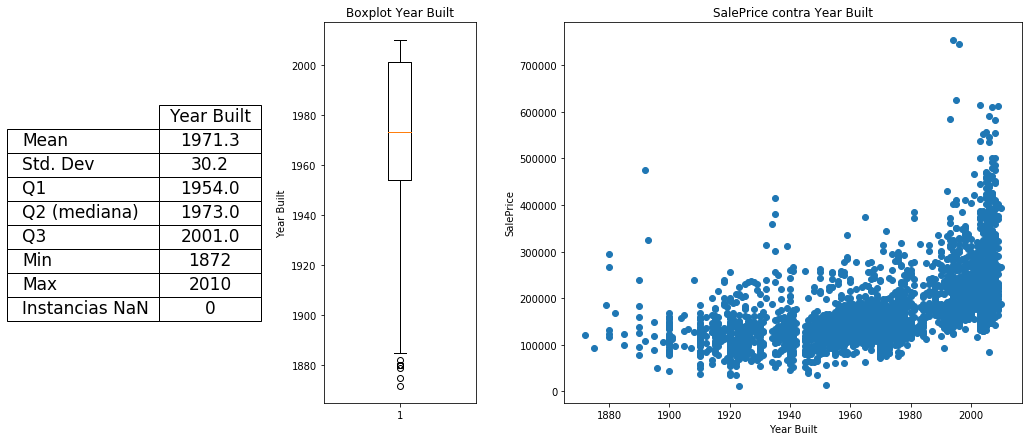

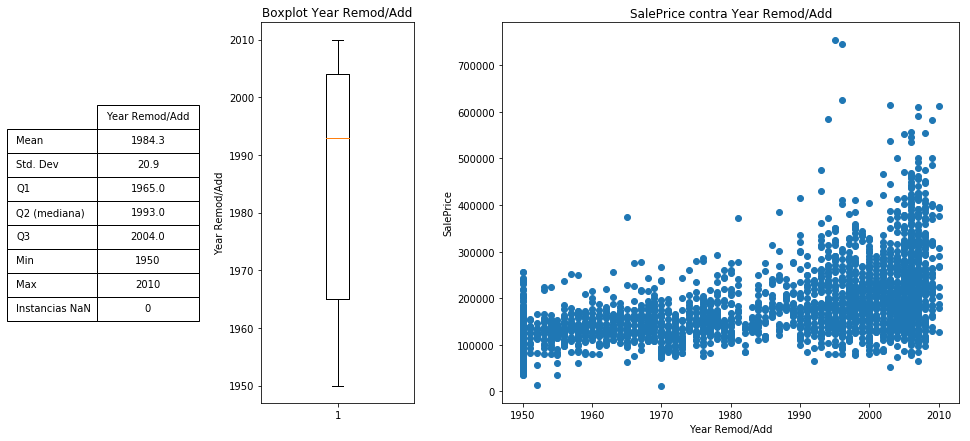

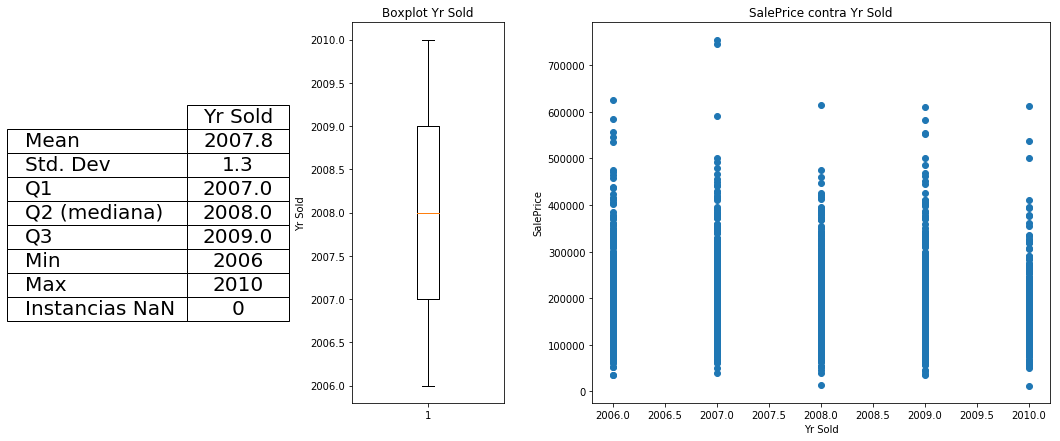

In [59]:
pylab.rcParams['figure.figsize'] = (15, 7)
for num in np.setdiff1d(numerical,label):
    
    fig, (ax1, ax11, ax2) = plt.subplots(1,3, gridspec_kw={'width_ratios': [1, 3, 9]})
    plt.subplots_adjust(wspace=0.4)
    
    ax1.axis('off') 
    
    cellText = [["%0.1f" % (means[num])], ["%0.1f" % (std[num])], ["%0.1f" % (cuantiles25[num])], ["%0.1f" % (medians[num])],
                ["%0.1f" % (cuantiles75[num])],["%d" % (mins[num])], ["%d" % (maxs[num])], ["%d" % (numnans[num])]]
    
    table = ax1.table(cellText=cellText, rowLabels=["Mean","Std. Dev", "Q1", "Q2 (mediana)", "Q3", "Min", "Max","Instancias NaN"], 
                      colLabels=[num], loc='center', cellLoc="center")
    table.set_fontsize(20)
    table.scale(2,2)
    
    no_nans = data_num[~data_num[num].isna()]
    
    ax11.boxplot(no_nans[num])
    ax11.set_title("Boxplot %s" % num)
    ax11.set_ylabel(num)
    
    ax2.plot(no_nans[num],no_nans[label],'o', label="Valores reales")
    
    ax2.set_title("%s contra %s" % (label, num))
    ax2.set_xlabel(num)
    ax2.set_ylabel(label)
    
    num = num.replace("/","-")
    fig.savefig("graphs/num/"+num+".png",bbox_inches='tight')
    
    plt.show()

# SalePrice

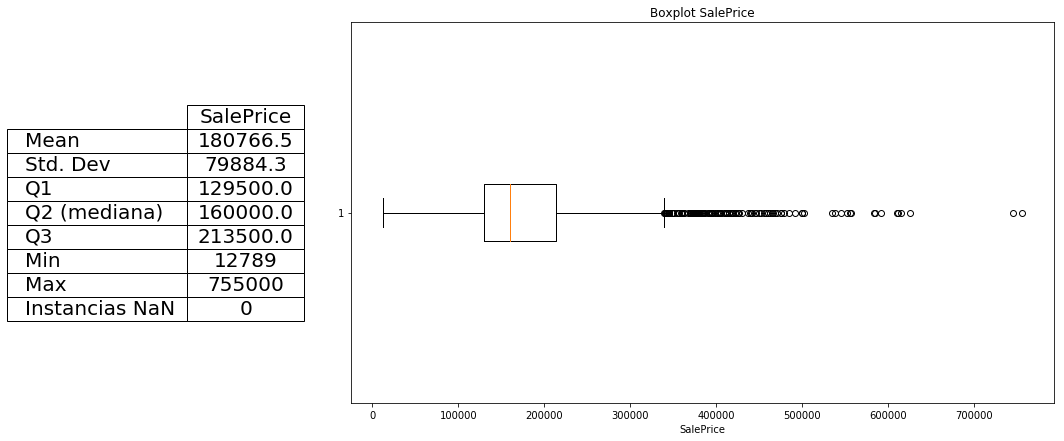

In [38]:
pylab.rcParams['figure.figsize'] = (15, 7)

fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 12]})
plt.subplots_adjust(wspace=0.2)

ax1.axis('off') 

cellText = [["%0.1f" % (means[label])], ["%0.1f" % (std[label])], ["%0.1f" % (cuantiles25[label])], ["%0.1f" % (medians[label])],
            ["%0.1f" % (cuantiles75[label])], ["%d" % (mins[label])], 
            ["%d" % (maxs[label])], ["%d" % (numnans[label])]]

table = ax1.table(cellText=cellText, rowLabels=["Mean","Std. Dev", "Q1", "Q2 (mediana)", "Q3", "Min", "Max","Instancias NaN"], 
                  colLabels=[label], loc='center', cellLoc="center")
table.set_fontsize(20)
table.scale(2,2)

no_nans = data_num[~data_num[label].isna()]

ax2.boxplot(no_nans[label], vert=False)
ax2.set_title("Boxplot %s" % label)
ax2.set_xlabel(label)

fig.savefig("graphs/SalePrice.png",bbox_inches='tight')

plt.show()